['Sokoto' 'Borno' 'Lake' 'Yobe' 'Katsina' 'Kebbi' 'Zamfara' 'Jigawa'
 'Kano' 'Bauchi' 'Kaduna' 'Niger' 'Gombe' 'Adamawa' 'Plateau' 'Kwara'
 'Taraba' 'Nassarawa' 'Abuja' 'Oyo' 'Kogi' 'Benue' 'Osun' 'Ekiti' 'Ondo'
 'Edo' 'Ogun' 'Enugu' 'Cross River' 'Ebonyi' 'Anambra' 'Lagos' 'Delta'
 'Abia' 'Imo' 'Rivers' 'Akwa Ibom' 'Bayelsa']


Shape #617: POLYGON

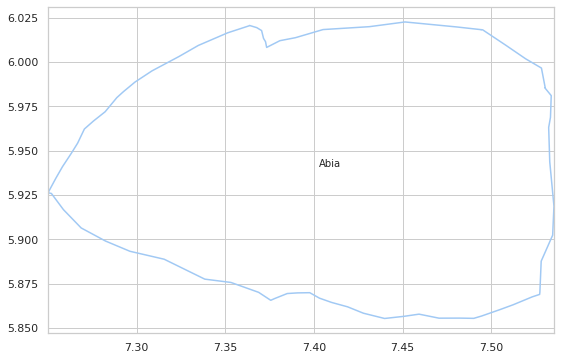

In [1]:
import sys
sys.path.append('/home/momo/anaconda3/lib/python3.8/site-packages')
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

#opening the vector map
shp_path = "new_lga_nigeria_2003.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

len(sf.shapes())

sf.records()

def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

print(df.STATE.unique())

def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

STATE = 'Abia'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Abia'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)


Shape #201: POLYGON

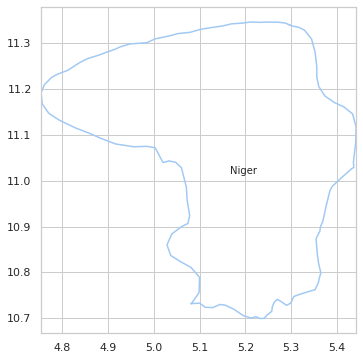

In [2]:
STATE = 'Niger'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Niger'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)

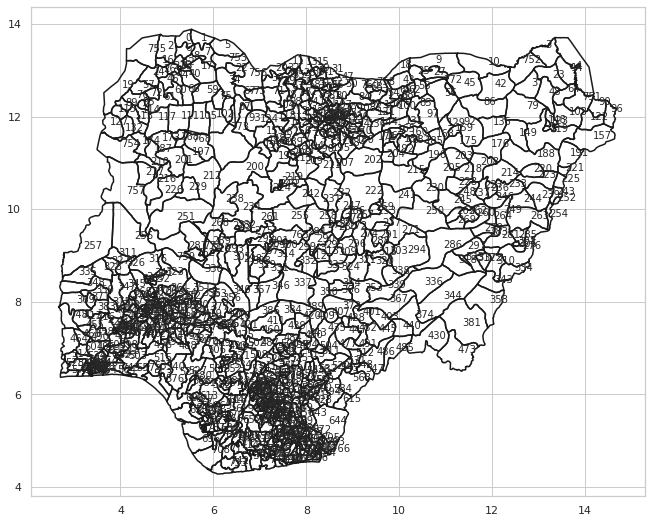

In [3]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [36]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        #print(data)
        #print(pd.DataFrame(data).rank(method='first'))
        new_data, bins = pd.cut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            #print(val)
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        #print(color_ton)
        return color_ton, bins;

def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        #print(i)
        #print(df[df.STATE  == "Adamawa" ].index.values[0])
        print(i)
        city_id.append(df[df.STATE == 
                            i].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
    
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
#df_sample = pd.DataFrame([])
#df_sample["STATE"]=df["STATE"]
#df_sample["coords"]=df["coords"]
#df_sample.to_csv("test.csv",index=False)
#df_sample = df_sample.reset_index(drop=True)
#df_sample.set_index('STATE')
#print(df_sample)
#print(sf.records())

#names= ["Abia","Adamawa","Akwa Ibom","Anambra","Abia","Bauchi","Bayelsa","Benue","Borno","Cross River","Delta","Ebonyi","Edo","Ekiti","Gombe","Imo"
#       ,"Kaduna","Kano","Katsina","Kebbi","Kogi","Kano","Kwara","Lagos","Nassarawa","Ogun","Ondo","Osun","Oyo"
#        ,"Plateau","Rivers","Sokoto","Taraba","Yobe","Zamfara"]

## "Fct Abuja" doesn't exist in the map ##
#data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
#print_id = True # The shape id will be printed
#color_pallete = 1 # ‘Purple’
#print(df.sample(5))
#plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)


/tmp/ipykernel_4508/3283923549.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)


['Enugu', 'Kaduna', 'Kwara', 'Niger']
[2, 1, 1, 1]

1: 0 => 0

2: 1 => 0

3: 1 => 0

4: 1 => 0

5: 1 => 0

6: 1 => 1


   1   2   3   4   5   6
Enugu
Kaduna
Kwara
Niger


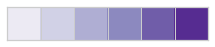

<Figure size 792x648 with 0 Axes>

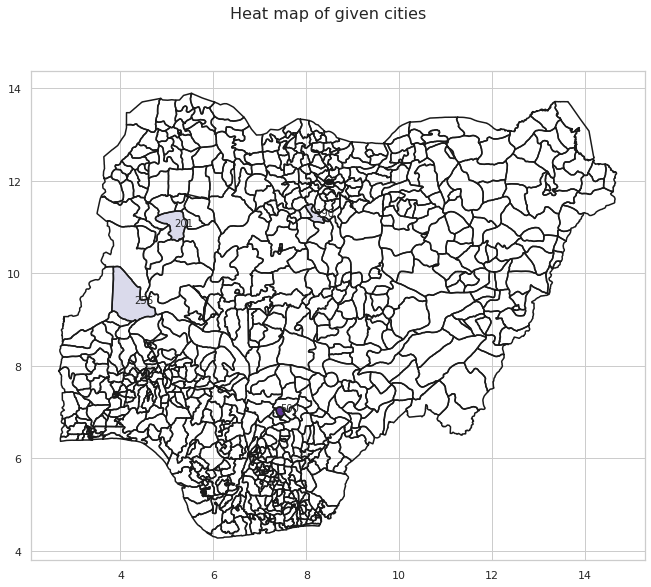

In [37]:
import pandas as pd           ## Import Pandas library for processing dataframe as pd
import numpy as np            ## Import Numy for processing matrix as np
import sys                    ##Import sys library for maximizing the csv limit for large csv file which can be Geneious file.
import csv                    ##Import csv module to input the csv file to dataframe 
Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)
#print(Combined_samples)
Combined_samples=Combined_samples[Combined_samples["TYPE"]=="mutation"]
Combined_samples=Combined_samples[Combined_samples["GENE"]=="K13"]
#Combined_samples_unique=Combined_samples["SITE"].unique

Combined_samples=Combined_samples.groupby('SITE').count()
#print(Combined_samples.index.values)
names=list(Combined_samples.index.values)
data=Combined_samples["Sample"].tolist()
#print(names)
index = names.index('Fct Abuja')
del names[index]
data=list(map(int, data))
del data[index]
print(names)
print(data)
#print(data)
print_id = True # The shape id will be printed
color_pallete = 1 # ‘Purple’
#print(df.sample(5))
plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)

/tmp/ipykernel_4508/1576973096.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)


['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nassarawa', 'Niger', 'Ogun', 'Ondo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara']
[27, 32, 36, 28, 24, 17, 21, 24, 29, 29, 33, 31, 32, 22, 23, 44, 27, 37, 31, 31, 14, 24, 18, 15, 18, 29, 17, 37, 8, 11, 27, 8, 13, 17]

1: 7 => 13

2: 14 => 19

3: 20 => 25

4: 26 => 31

5: 32 => 37

6: 38 => 43


   1   2   3   4   5   6
Abia
Adamawa
Akwa Ibom
Anambra
Bauchi
Bayelsa
Benue
Borno
Cross River
Delta
Ebonyi
Edo
Ekiti
Enugu
Gombe
Imo
Jigawa
Kaduna
Kano
Katsina
Kebbi
Kogi
Kwara
Lagos
Nassarawa
Niger
Ogun
Ondo
Plateau
Rivers
Sokoto
Taraba
Yobe
Zamfara


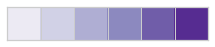

<Figure size 792x648 with 0 Axes>

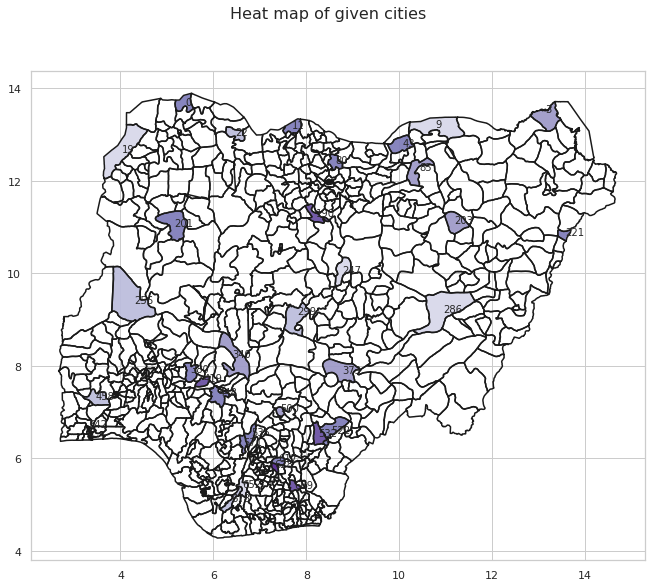

In [39]:
import pandas as pd           ## Import Pandas library for processing dataframe as pd
import numpy as np            ## Import Numy for processing matrix as np
import sys                    ##Import sys library for maximizing the csv limit for large csv file which can be Geneious file.
import csv                    ##Import csv module to input the csv file to dataframe 
Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)
#print(Combined_samples)
Combined_samples=Combined_samples[Combined_samples["TYPE"]=="mutation"]
Combined_samples=Combined_samples[Combined_samples["GENE"]=="DHPS"]
#Combined_samples_unique=Combined_samples["SITE"].unique

Combined_samples=Combined_samples.groupby('SITE').count()
#print(Combined_samples.index.values)
names=list(Combined_samples.index.values)
data=Combined_samples["Sample"].tolist()
#print(names)
index = names.index('Fct Abuja')
names[names.index('Nasarawa')] = 'Nassarawa'
del names[index]
data=list(map(int, data))
del data[index]
print(names)
print(data)
#print(data)
print_id = True # The shape id will be printed
color_pallete = 1 # ‘Purple’
#print(df.sample(5))
plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)

/tmp/ipykernel_4508/3878946489.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)


['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nassarawa', 'Niger', 'Ogun', 'Ondo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara']
[24, 27, 30, 18, 36, 18, 27, 21, 24, 21, 33, 27, 30, 24, 29, 36, 27, 39, 30, 36, 24, 24, 15, 17, 15, 34, 15, 27, 9, 15, 24, 6, 12, 15]

1: 5 => 10

2: 11 => 16

3: 17 => 21

4: 22 => 27

5: 28 => 32

6: 33 => 38


   1   2   3   4   5   6
Abia
Adamawa
Akwa Ibom
Anambra
Bauchi
Bayelsa
Benue
Borno
Cross River
Delta
Ebonyi
Edo
Ekiti
Enugu
Gombe
Imo
Jigawa
Kaduna
Kano
Katsina
Kebbi
Kogi
Kwara
Lagos
Nassarawa
Niger
Ogun
Ondo
Plateau
Rivers
Sokoto
Taraba
Yobe
Zamfara


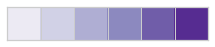

<Figure size 792x648 with 0 Axes>

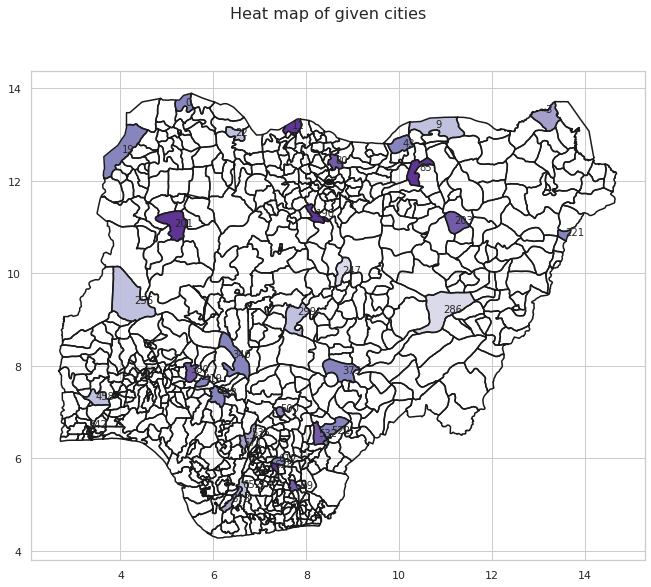

In [40]:
import pandas as pd           ## Import Pandas library for processing dataframe as pd
import numpy as np            ## Import Numy for processing matrix as np
import sys                    ##Import sys library for maximizing the csv limit for large csv file which can be Geneious file.
import csv                    ##Import csv module to input the csv file to dataframe 
Combined_samples=pd.read_csv("NG21_pooled_EPI_QC_voi.csv", engine='python', error_bad_lines=False)
#print(Combined_samples)
Combined_samples=Combined_samples[Combined_samples["TYPE"]=="mutation"]
Combined_samples=Combined_samples[Combined_samples["GENE"]=="DHFR"]
#Combined_samples_unique=Combined_samples["SITE"].unique

Combined_samples=Combined_samples.groupby('SITE').count()
#print(Combined_samples.index.values)
names=list(Combined_samples.index.values)
data=Combined_samples["Sample"].tolist()
#print(names)
index = names.index('Fct Abuja')
names[names.index('Nasarawa')] = 'Nassarawa'
del names[index]
data=list(map(int, data))
del data[index]
print(names)
print(data)
#print(data)
print_id = True # The shape id will be printed
color_pallete = 1 # ‘Purple’
#print(df.sample(5))
plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)